## professional
### hypothesis
horizontal

vertical

downside risk

portofolio analysis -> mean & sharpe

h1. your 'entry-exit-rule & parameter' is good

h2. your 'weights' is good

### experiment
different markets

### argue
incosistent=

### skill
s1. market selecting

### spot trader
#### instrument
price diff
price return

####  market strength forecast & market risk forecast: relative coordinate
0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0

#### position
principle
1.  capital% for historical comparison
2. market forecast
3. market risk forecast

### portofolio manager
initial
    weights
    capital distribution
        
### user experience
cost: capital C
benefit: portfolio experiencing at different time-period


### attack
periodic reblancing

2022-10-22 20:20:32 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-22 20:20:32 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


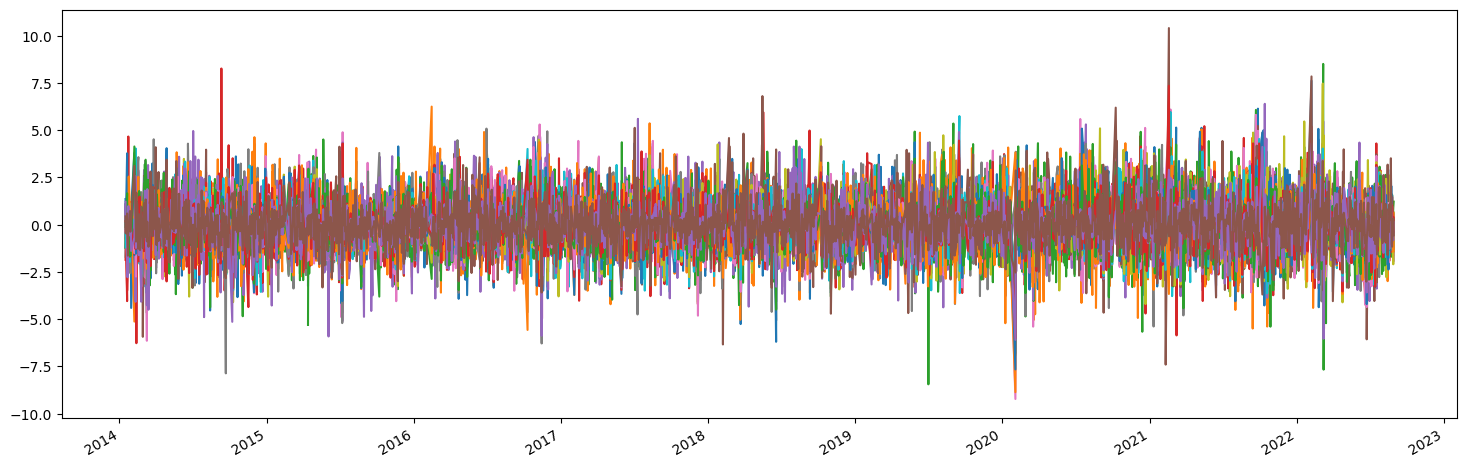

<AxesSubplot:>

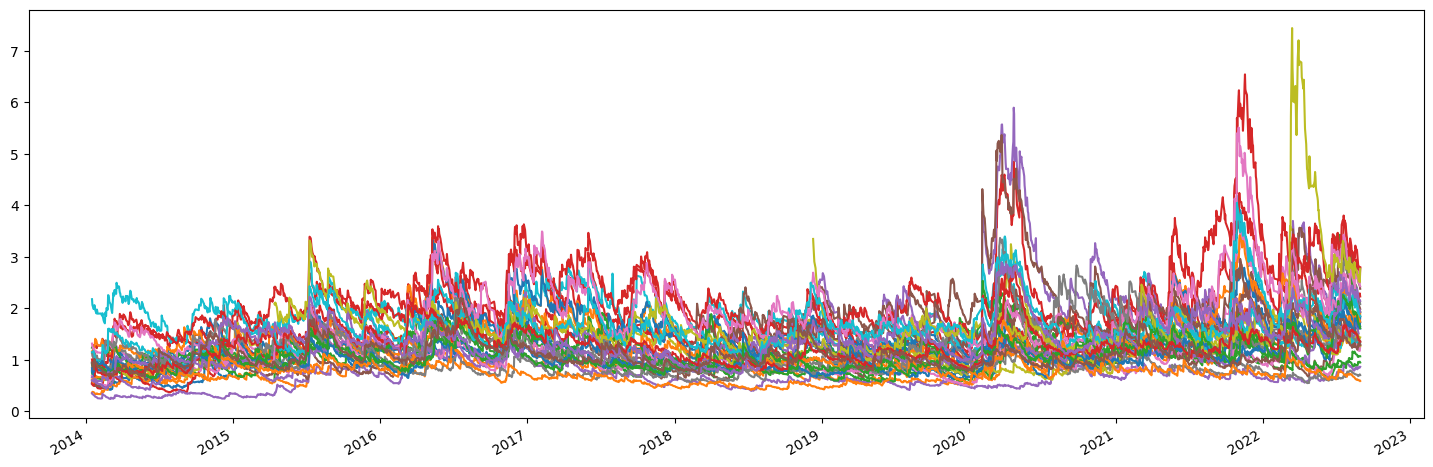

In [436]:
'''
market risk forecast
'''
from ctse.systems.ct_system import ct_system
import matplotlib.pyplot as plt
from syscore.pdutils import pd_readcsv
import pandas as pd
import numpy as np

sys = ct_system(capital_correction_method='syscore.capital.full_compounding')
inss =sys.data.get_instrument_list()
i = 7
dfr = []
dft = []
for i,ins in enumerate(inss[:]):
    price = sys.data.daily_prices(ins).rename(ins)
    risk = sys.positionSize.get_price_volatility(ins).rename(ins)
    dfr.append(risk)
    # price.plot(legend=True, figsize=(15,6))
    # risk.plot(secondary_y=True, legend=False, figsize=(18,6))
    
    tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, 20), date_index_name='index')
    # tmp = tmp['tr_the_close_price'].pct_change()
    tmp = tmp['tr_the_close_price'] / tmp['tr_the_close_price'].shift(1) - 1
    # tmp[tmp >=0 ] = np.nan
    dft.append(tmp)
    # strength = sys.rules.get_raw_forecast(ins, 'dma_long_1_D')
    # strength.plot(secondary_y=True, legend=True)

dft = pd.concat(dft, axis=1)
dfr = pd.concat(dfr, axis=1).loc[dft.index]
dft.columns = dfr.columns

(dft * 100/dfr).plot(legend=False, figsize=(18,6))
plt.show()

dfr.plot(legend=False, figsize=(18,6))

In [233]:
display(dfr.idxmin(axis=1).dropna().unique())
# number has semantics? give semantics a number?
# absolute value?

array(['C', 'AL', 'AU', 'CF', 'OI', 'SR', 'CU', 'SP'], dtype=object)

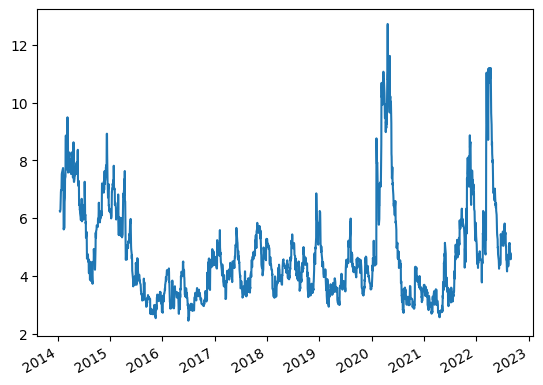

<AxesSubplot:>

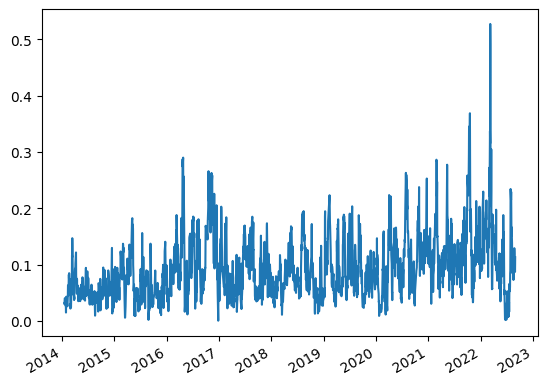

In [265]:
(dfr.max(axis=1) / dfr.min(axis=1)).plot()
plt.show()
(dft.max(axis=1).abs()).plot()
# price.pct_change().rolling(10).mean().plot(secondary_y=True, alpha=0.2, figsize=(12,6))
# random process & realization, why? because we are forecasting, so realization has no meaning.
# what should we give up attempting to know?
# noise and purely random
# what can we know?
# what can we be more certain about?
# two different timeseries
# ask the right question

# volatility and leverage, if same trend mean
# mean, std, weights, how different will the outcome be?
# is it good? Yes.
# how you prove it? logic? or Number ?
# transcaotion cost is number
# buy low, sell high is nunber

In [484]:
from lib2to3.refactor import RefactoringTool
import riskfolio as rp
from statsmodels.stats.moment_helpers import corr2cov
import numpy as np
from optimizer import ExpectedPortfolio

mean = [0.0005] * len(dfr.columns)
mu = (dfr.sample(1).iloc[0]/100).to_list()
df = pd.DataFrame([mean, mu]).dropna(axis=1)
mu = df.iloc[0].to_list()
std = df.iloc[1].to_list()

from random import randint
i = randint(0, len(dft.index) - 31)
returns = dft.iloc[i:i+30].dropna().iloc[:, :len(std)]
display(returns)
corr = returns.corr()
display(corr)

port = rp.Portfolio(pd.DataFrame([[0.01] * len(mu)]))
port.mu = mu
port.cov = corr2cov(corr, std)
w = port.optimization(model='Classic', rm='MV', obj='Sharpe').T.values.tolist()[0]
classic_p = ExpectedPortfolio(mu, assets_corr=corr, assets_std=std)
classic_p.update_weights(w)
print('classic_geo_mean:{} \n'.format(classic_p.geometric_mean() / classic_p.std() * 16))

# if, hypothesis, then.
# dose hypothesis holds?
# forecast weights
# 1. is it a random process? is process changing?
# 2. is parameter right?
# 3. is parameter changing?

benchmark_p = ExpectedPortfolio(mu, assets_corr=corr, assets_std=std)
benchmark_p.update_weights(len(mu)*[1/len(mu)])
print('benchmark_geo_mean:{} \n'.format(benchmark_p.geometric_mean() / benchmark_p.std() * 16))

,V,AL,A,BU,C,CF,CU,P,PP,EG,...,RB,FG,JD,I,ZN,AP,J,AG,NI,MA
2020-02-20,0.008786,-0.002918,-0.020759,0.011089,-0.002618,0.004902,0.000647,0.011021,0.012195,0.008084,...,0.019446,0.015647,0.004315,0.033308,0.000582,0.036444,0.017915,0.003377,0.002601,0.002358
2020-02-21,0.003959,-0.006584,0.007797,-0.003871,0.003675,-0.004503,-0.009477,-0.002544,-0.004623,0.006015,...,0.007225,0.000700,0.019765,0.012744,-0.008731,0.003447,-0.004267,0.012340,-0.016622,-0.002824
2020-02-24,-0.001577,-0.003682,-0.004110,-0.014249,0.000523,-0.024877,0.000217,-0.015665,-0.003800,-0.012843,...,-0.002582,0.004899,-0.006461,-0.002221,-0.025543,0.000000,-0.001607,0.007535,0.003615,-0.017461
2020-02-25,0.001580,0.000370,0.002913,0.014455,0.001045,0.006185,-0.001087,-0.016284,0.000424,0.005608,...,0.003740,-0.004875,-0.004524,-0.002226,-0.002109,0.000825,0.003219,-0.021337,-0.000487,0.023535
2020-02-26,-0.003943,-0.003325,0.009683,-0.042098,-0.001044,-0.016135,-0.006964,-0.014673,-0.005084,-0.014499,...,-0.012038,-0.002799,-0.003408,-0.038662,-0.006341,-0.021557,-0.013904,-0.010564,-0.019382,-0.017832
2020-02-27,-0.003167,-0.004448,0.000000,-0.035835,0.007318,-0.014057,-0.004164,-0.009164,-0.004542,-0.006111,...,-0.008123,-0.009123,-0.040467,-0.020882,0.000304,-0.035644,-0.021150,-0.003408,0.000993,-0.004778
2020-02-28,-0.010326,-0.023827,-0.022297,-0.040673,-0.002595,-0.035248,-0.023107,-0.046628,-0.025524,-0.012526,...,-0.024569,-0.016289,-0.029403,-0.026066,-0.036452,-0.015861,-0.008864,-0.050832,-0.025104,-0.035046
2020-03-02,0.004815,0.011060,0.019372,0.045322,0.010926,0.017241,0.018923,0.017381,0.021656,0.007149,...,0.026087,0.016559,0.059058,0.059205,0.018916,0.010942,0.027390,-0.016571,0.038168,0.017413
2020-03-03,0.001597,0.001886,0.000962,0.016084,-0.001029,0.010492,0.008623,-0.012714,0.011744,-0.000687,...,-0.000292,-0.012748,-0.005779,-0.013017,0.001849,-0.002048,-0.005169,-0.005861,0.003431,0.000978
2020-03-04,0.000000,-0.005648,0.010094,0.000000,-0.001546,-0.002396,-0.007453,0.016499,0.007078,-0.002291,...,0.016369,-0.001435,0.009300,0.024050,-0.012612,0.002931,0.002461,0.020634,-0.000583,-0.003908


,V,AL,A,BU,C,CF,CU,P,PP,EG,...,RB,FG,JD,I,ZN,AP,J,AG,NI,MA
V,1.000000,0.507296,-0.436131,0.214415,-0.008692,0.393540,0.412812,0.111555,0.659037,0.595605,...,0.430500,0.289045,-0.036489,0.342197,0.400907,0.031549,0.192939,0.202002,0.461730,0.402322
AL,0.507296,1.000000,0.056106,0.497633,0.241767,0.643743,0.915303,0.380800,0.526579,0.549415,...,0.474473,0.577731,0.106043,0.481237,0.784535,0.253730,0.365257,0.507635,0.605134,0.523541
A,-0.436131,0.056106,1.000000,-0.142789,0.243268,0.171250,0.015341,0.529488,-0.278632,-0.413459,...,0.089981,0.147496,0.252831,0.212821,0.051321,-0.158212,0.078487,-0.046413,0.237683,-0.083619
BU,0.214415,0.497633,-0.142789,1.000000,0.135667,0.330204,0.609786,0.396949,0.546828,0.475521,...,0.212794,0.332089,0.334655,0.211894,0.514196,0.387475,0.154110,0.464268,0.237708,0.629140
C,-0.008692,0.241767,0.243268,0.135667,1.000000,0.274302,0.369586,0.331667,0.142742,0.027595,...,0.010091,0.255386,0.057114,0.128320,0.444006,-0.048528,0.191405,0.349116,0.321919,0.191822
CF,0.393540,0.643743,0.171250,0.330204,0.274302,1.000000,0.557542,0.471758,0.544971,0.516697,...,0.450077,0.507973,0.155002,0.615623,0.554380,0.228969,0.250958,0.317327,0.509920,0.484326
CU,0.412812,0.915303,0.015341,0.609786,0.369586,0.557542,1.000000,0.440907,0.561694,0.503299,...,0.334875,0.541117,0.178496,0.369269,0.839558,0.242691,0.326342,0.592514,0.613740,0.540979
P,0.111555,0.380800,0.529488,0.396949,0.331667,0.471758,0.440907,1.000000,0.309651,-0.047599,...,0.420456,0.604920,0.189572,0.525870,0.454206,-0.026609,0.323854,0.313274,0.491918,0.251005
PP,0.659037,0.526579,-0.278632,0.546828,0.142742,0.544971,0.561694,0.309651,1.000000,0.831963,...,0.443137,0.429214,0.259200,0.461916,0.492004,0.241279,0.172814,0.425740,0.452829,0.780056
EG,0.595605,0.549415,-0.413459,0.475521,0.027595,0.516697,0.503299,-0.047599,0.831963,1.000000,...,0.293827,0.251340,0.180757,0.350135,0.468495,0.378803,0.054796,0.349958,0.327657,0.752202


classic_geo_mean:2.6290902470375936 

benchmark_geo_mean:0.9135319021864742 



/Users/weiranzhou/Library/Python/3.8/lib/python/site-packages/riskfolio/OwaWeights.py:31: RuntimeWarning: invalid value encountered in divide
  w_ = 2 * np.array(w_) / (T * (T - 1))


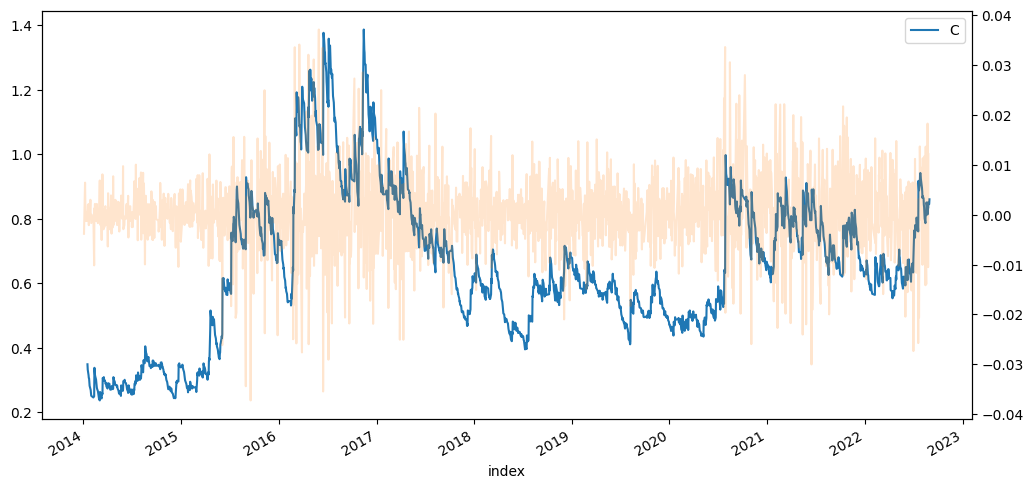

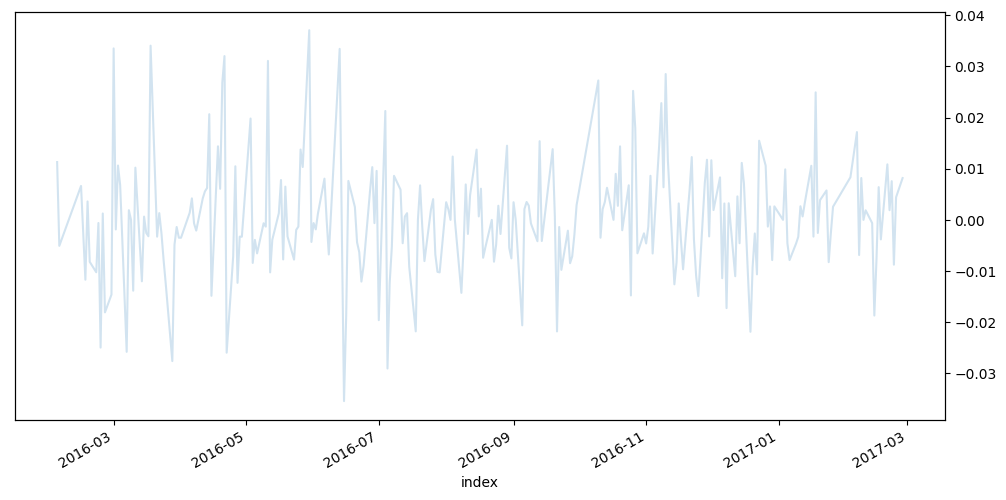

<AxesSubplot:xlabel='index'>

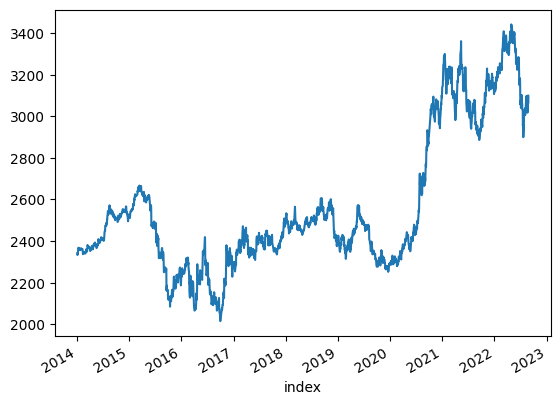

In [231]:
dfr[['C']].plot()
# plt.show()
from ctse.sysdata.csv_ctse_strategy_backtest_data import csvCTSEStrategyBacktestData
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
price = csvCTSEStrategyBacktestData().read('C', 'dma_long_1_D')[ctseStrategyBacktest.CLOSE]
price.pct_change().plot(secondary_y=True, alpha=0.2, figsize=(12,6))
# random process & realization, why? because we are forecasting, so realization has no meaning.
plt.show()
price.plot()
# what should we give up attempting to know?
# noise and purely random
# what can we know?
# what can we be more certain about?

2022-10-21 22:55:31 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-10-21 22:55:31 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-10-21 22:55:31 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-10-21 22:55:31 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-10-21 22:55:31 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-10-21 22:55:31 {'type': 'base_system', 'stage': 'config'}  Adding config defaults
2022-10-21 22:55:31 {'type': 'base_system'}  Following instruments are 'duplicate_markets' ['Another_thing', 'bad

<AxesSubplot:xlabel='index'>

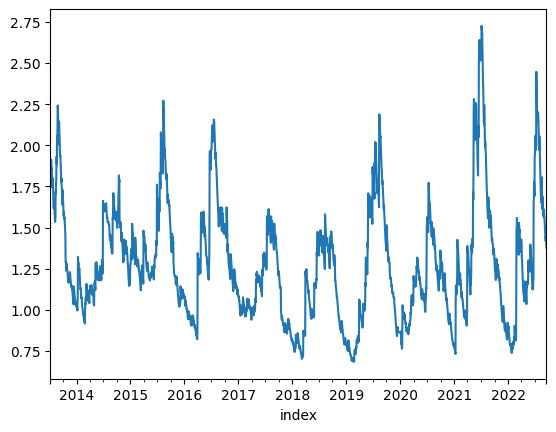

In [228]:
from systems.provided.example.simplesystem  import simplesystem
simplesystem().positionSize.get_price_volatility('CORN').tail(2400).plot()

<AxesSubplot:>

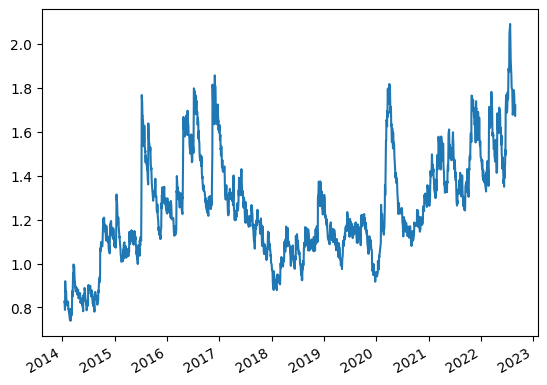

In [188]:
dfr.median(axis=1).plot()

2022-10-20 15:16:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-20 15:16:44 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


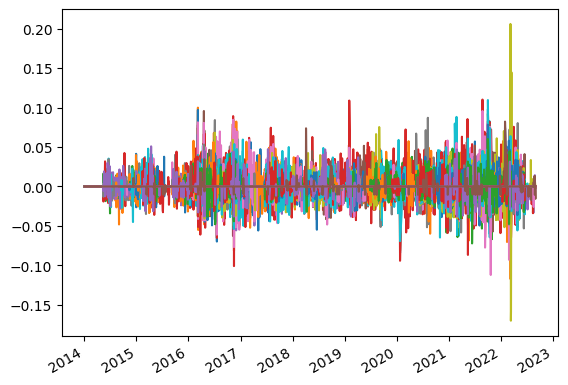

In [126]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for ins in inss:
    tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, 20), date_index_name='index')
    tmp = tmp['tr_nav_of_product'].pct_change()
    tmp .plot()
    # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
plt.show()



2022-10-14 16:28:01 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-14 16:28:01 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode


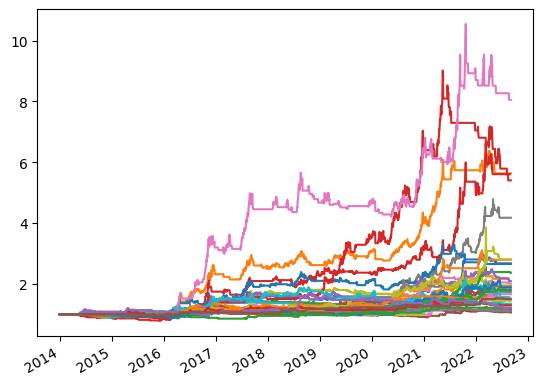

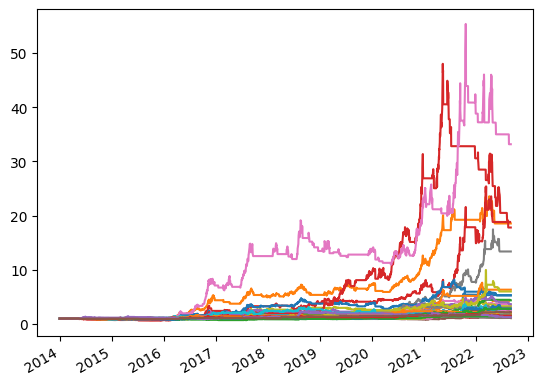

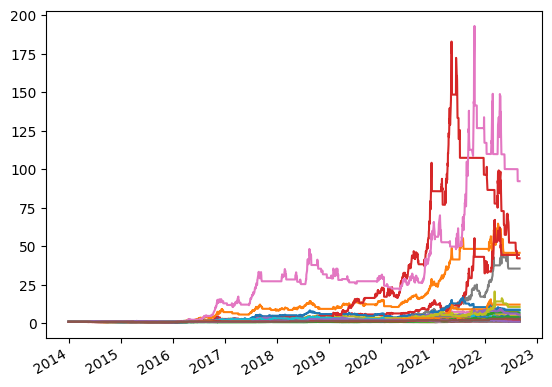

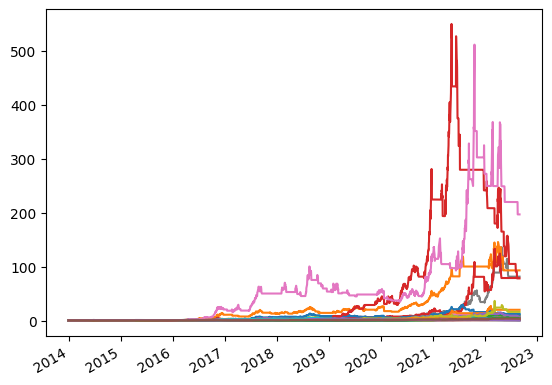

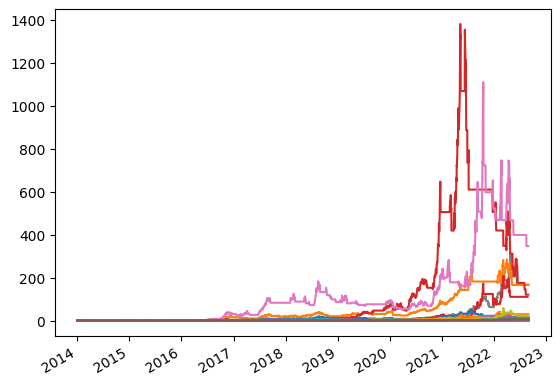

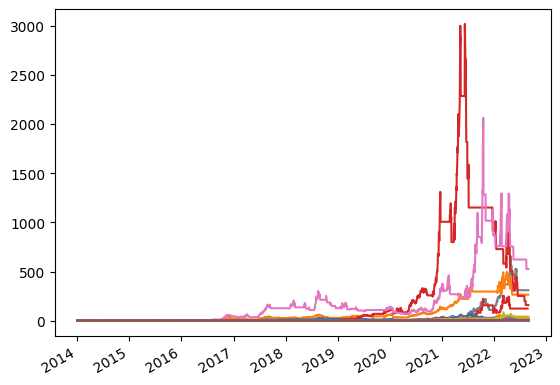

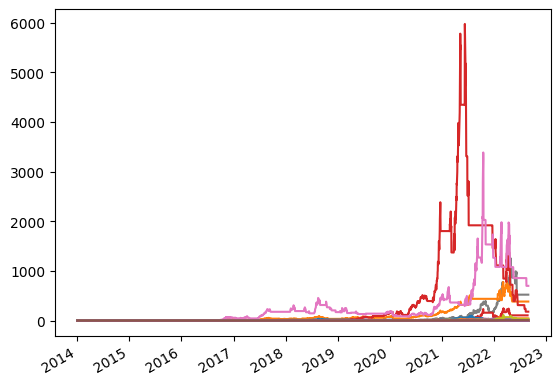

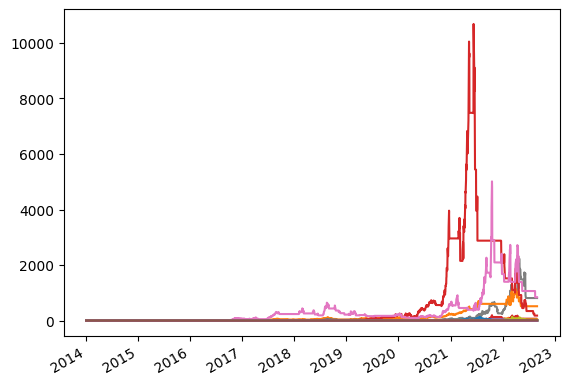

In [4]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for risk_target in range(1, 9):
    for ins in inss:
        tmp = pd_readcsv(r'../../ctse/data/tmp/get_leveraged_returns/{}_{}.csv'.format(ins, risk_target), date_index_name='index')
        
        tmp = tmp[['tr_nav_of_product', 'leveraged_nav']]
        tmp['leveraged_nav'].plot()
        
        # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
    plt.show()



2022-10-14 16:03:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-14 16:03:20 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode


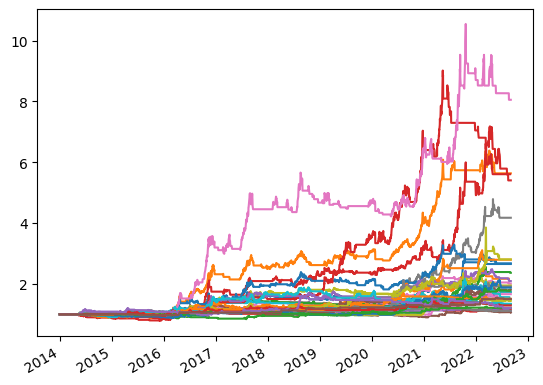

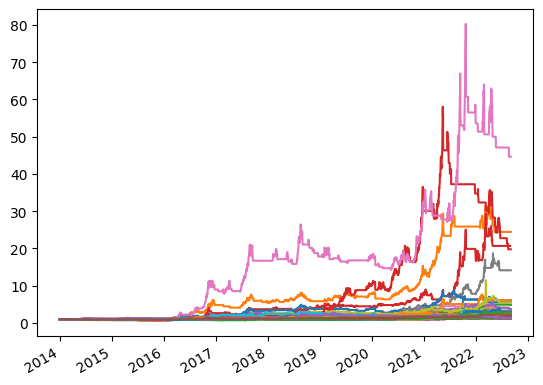

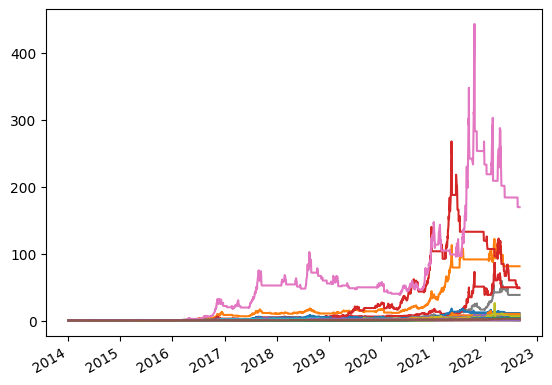

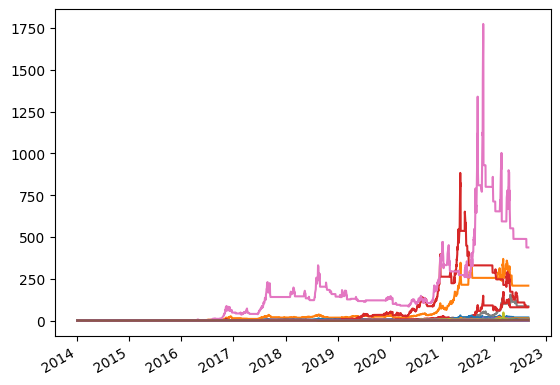

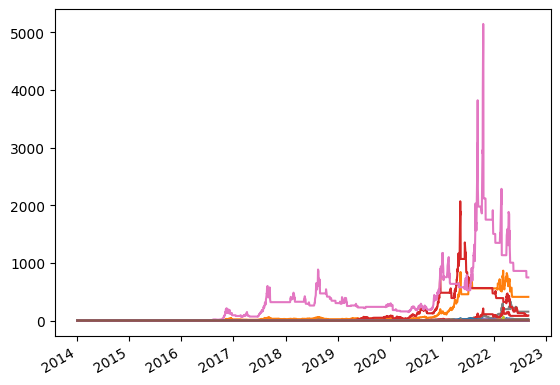

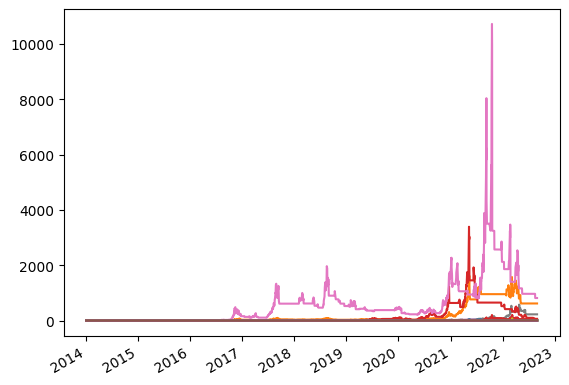

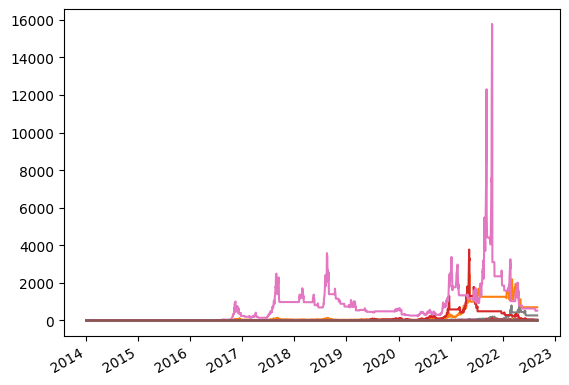

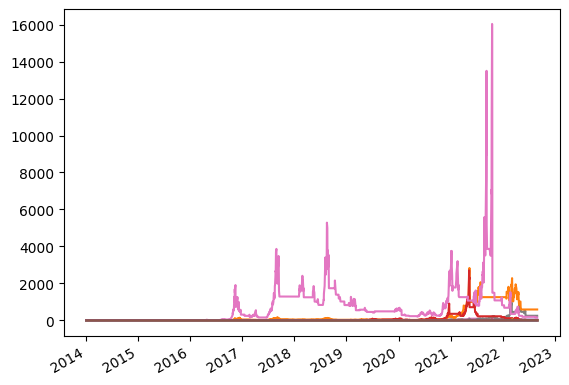

In [3]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
from Measures import Measures
from ctse.sysobjects.ctse_strategy_backtest import ctseStrategyBacktest
import matplotlib.pyplot as plt

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()

for risk_target in range(1, 9):
    for ins in inss:
        tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, risk_target), date_index_name='index')
        
        tmp = tmp['tr_nav_of_product']
        (tmp.pct_change() * risk_target + 1).cumprod().plot()
        
        # measures = Measures(tmp, ctseStrategyBacktest.DATETIME, 'leveraged_nav')   
    plt.show()



In [ ]:
from sympy import symbols, simplify
c, L, r1, r2, r3, r4 = symbols('c L r1 r2 r3 r4')

nc1 = c * L * (1 + r1)
nc2 =nc1 * (1 + r2)
nc3 =nc2 * (1 + r3)
nc4 =nc3 * (1 + r4)


c1 = nc1 - c * (L - 1)
c2 = nc2 -  c * (L - 1)
c3 = nc3 -  c * (L - 1)
c4 = nc4 -  c * (L - 1)

lr1 = simplify(c1 / c - 1)
lr2 = simplify(c2 / c1 - 1)
lr3 = simplify(c3 / c2 - 1)
lr4 = simplify(c4 / c3 - 1)
lr1.subs([(L, 2), (r1, 0.1), (r2, -0.1), (r3, 0.1), (r4, -0.1)])


0.200000000000000

In [118]:
from ctse.systems.ct_system import ct_system
from syscore.pdutils import pd_readcsv
import pandas as pd

inss  = ct_system(capital_correction_method='syscore.capital.full_compounding').data.get_instrument_list()
i = 1
dfo = []
dfl = []
for ins in inss:
    tmp = pd_readcsv(r'../../ctse/data/tmp/{}_{}.csv'.format(ins, 20), date_index_name='index')[['tr_nav_of_product', 'leveraged_nav']]
    dfo += tmp['tr_nav_of_product'].pct_change().tail(100).to_list()
    dfl += tmp['leveraged_nav'].pct_change().tail(100).to_list()
dfo = pd.Series(dfo)
dfl = pd.Series(dfl)

2022-10-20 15:06:09 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-10-20 15:06:09 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


In [120]:
# o = dfo[dfo > 0].mean() / - dfo[dfo < 0].mean()
# l = dfl[dfl > 0].mean() / - dfl[dfl < 0].mean()
o = dfo.mean()
l = dfl.mean()
print(l/o)

0.7176612858096999


<AxesSubplot:>

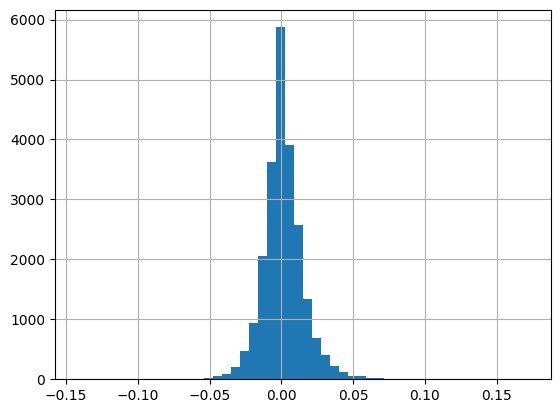

In [77]:
import numpy as np
pd.Series(dfl).replace(0, np.nan).hist(bins=50)

<AxesSubplot:xlabel='index'>

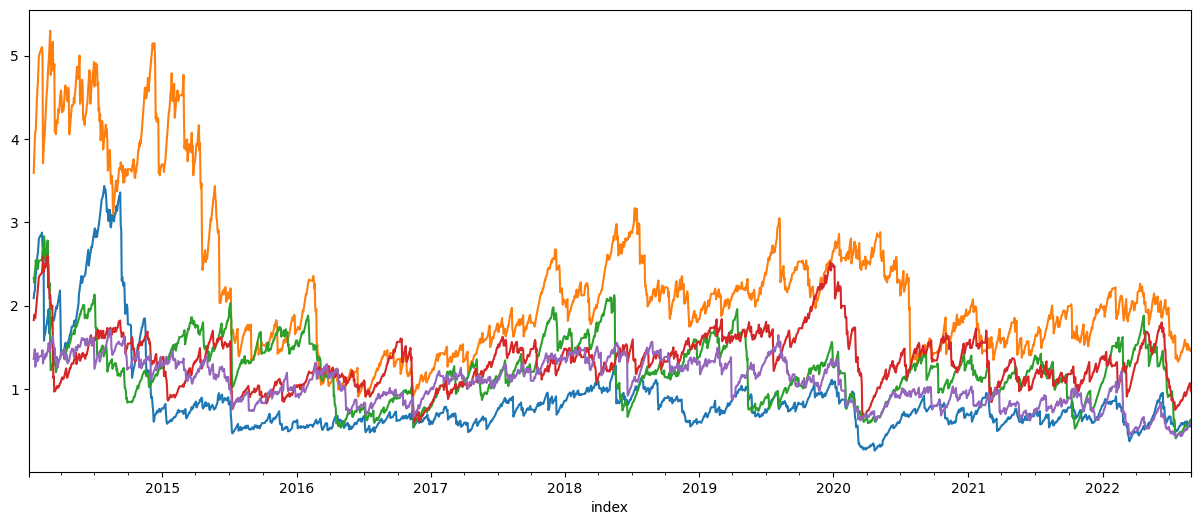

In [11]:
csv.iloc[:, 3:8].plot(figsize=(15,6), legend=False)